Try to recreate the assaingments in Machine Learning Standford course in Coursera using Python.

# Assigment 1 Gradient descent 

<a href=#step2>Data Visualization</a>

<a href=#step1>Implement cost function</a>

<a href=#step3>Implement Gradient Descent</a>

<a href=#step4>Run Gradient Descent and predict</a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Step 1 : Data Visualization <a name='step2' />

In [2]:
def plotData(x, y):
    # ‘rx’ stands for red crosses
    plt.plot(x,y,'rx', markersize=10, label='Training data')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.show(block=False) # prevents having to close the graph to move forward 

In [3]:
# Loading the data
data = np.loadtxt('ex1data1.txt', delimiter=",")
X = data[:,0]
y = data[:,1]
m = len(y) # number of training examples

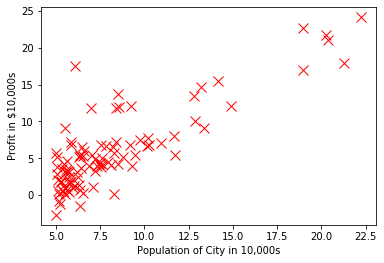

In [4]:
# Plot the graph
plt.plot(X,y,'rx', markersize=10, label='Training data') 
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s') 
plt.show()

Step 2 : Implement cost function <a name='step1' />

Formula in Matlab:
J = (1/(2*m)) *sum( (((X*theta)-y).^2))

Now, I need to use the same formula in Python

In [13]:
def computeCost(X, y, theta):
    
    # (X*theta)-y).^2
    # Dot product of two arrays
    s = np.power(( X.dot(theta) - np.transpose([y]) ), 2)
    #J = (1/(2*m)) *sum( (((X*t.heta)-y).^2))
    J = (1.0/(2*m)) * s.sum( axis = 0 )
    
    return J


Step 3 : Implement Gradient Descent <a name='step3' />

In [16]:
J_history = np.zeros((2, 1))

def gradientDescent(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = len(y) # number of training examples
    global J_history
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        
        # Formula: θj:=θj−α * ∂θj∂J(θ0,θ1), ∂θj∂J(θ0,θ1) will be smaller and smaller
    
        theta = theta - alpha*(1.0/m) * np.transpose(X).dot(X.dot(theta) - np.transpose([y]))
        J_history[i] = computeCost(X, y, theta)
    return theta

Step 4 : Run Gradient Descent and predict <a name='step4' />

In [17]:
# Prepare matrixs
X_padded = np.column_stack((np.ones((m,1)), X)) # Add a column of ones to x, which is the constant
theta = np.zeros((2, 1)) # initialize fitting parameters, y= theta1 x + theta 2

# Settings for the gradient descent 
iterations = 1500
alpha = 0.01

# compute and display initial cost
computeCost(X_padded, y, theta)

array([32.07273388])

In [18]:
# run gradient descent
theta = gradientDescent(X_padded, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent: ')
print("{:f}, {:f}".format(theta[0,0], theta[1,0]))

Theta found by gradient descent: 
-3.630291, 1.166362


In [19]:
J_history

array([[6.73719046],
       [5.93159357],
       [5.90115471],
       ...,
       [4.48343473],
       [4.48341145],
       [4.48338826]])

J is still decreaseing

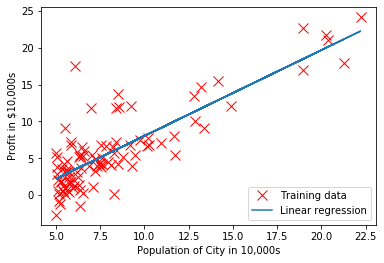

In [20]:
# # Plot the linear fit
plt.plot(X,y,'rx', markersize=10, label='Training data') 
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s') 
plt.plot(X,X_padded.dot(theta),'-', label='Linear regression')
plt.legend(loc='lower right')
plt.draw()

In [21]:
# # Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)
print("For population = 35,000, we predict a profit of {:f}".format( float(predict1*10000) ))
predict2 = np.array([1, 7]).dot(theta)
print('For population = 70,000, we predict a profit of {:f}'.format( float(predict2*10000) ))


For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129
